In [1]:
# Common imports
import pandas as pd
import numpy as np

# Imports from utils
from utils import save_fig
from utils import plot_dataset
from utils import poly_features
from utils import normal_equation
from utils import ridge_regression

# For plot/visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load the sample dataset
dataset = pd.read_csv('datasets/age_income_data.csv', header=0, names=['ID', 'age', 'income'])
print('\nNumber of records:',len(dataset))
print('\n\n',dataset.head())


Number of records: 5


    ID  age  income
0   1   21   24000
1   2   32   48000
2   3   62   83000
3   4   72   61000
4   5   84   52000


In [3]:
# Setting up training data
X = pd.DataFrame(dataset,columns=['age']).values
y = dataset['income'].values
print('The shape of X:',X.shape)
print('The shape of y:',y.shape)

The shape of X: (5, 1)
The shape of y: (5,)


Saving figure training_data


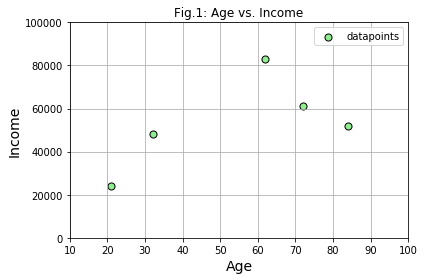

In [4]:
plt.figure(1)
plot_dataset(X,y)
plt.title('Fig.1: Age vs. Income')
plt.axis([10.0,100.0,0.0,100000])
plt.legend()
save_fig("training_data")
plt.show()

In [5]:
def simple_linear_regression(X,y):
    # Compute theta with normal equations
    X = np.insert(X,0,1,axis=1)
    ln_theta = normal_equation(X,y)
    
    # Fit Simple linear Regression
    Xval = np.arange(X.min()-25, X.max()+25, 0.05)
    Xval = np.reshape(Xval, (len(Xval), 1))
    Xval = np.insert(Xval,0,1,axis=1)
    
    # Plot linear regression
    plt.plot(Xval[:,1], np.dot(Xval, ln_theta), 'b--')

Saving figure simple_linear_regression


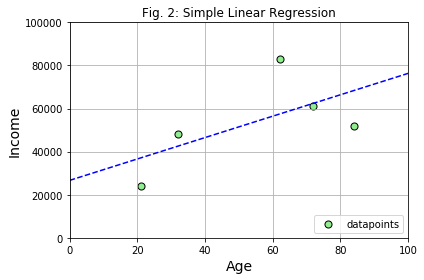

In [6]:
plt.figure(2)
plt.title("Fig. 2: Simple Linear Regression")
plot_dataset(X,y)
simple_linear_regression(X,y)
plt.legend(loc="lower right")
plt.axis([0.0,100.0,0.0,100000])
save_fig("simple_linear_regression")
plt.show()

In [7]:
def polynomial_regression(X,y,degree):
    # Compute theta with normal equation
    Xpoly = poly_features(X,degree)
    Xpoly = np.insert(Xpoly,0,1,axis=1)
    pr_theta = normal_equation(Xpoly,y)
    
    # Fit polynomial regression equation
    XX = np.arange(X.min()-50, X.max()+50, 0.05)
    Xval = np.reshape(XX, (len(XX), 1))
    # Map the X values 
    Xval_poly = poly_features(Xval, degree)
    Xval_poly = np.insert(Xval_poly,0,1,axis=1)
    
    return Xval_poly, pr_theta

Saving figure polynomial_regression


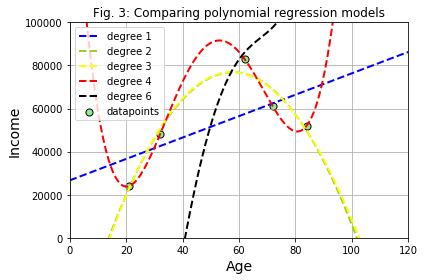

In [8]:
plt.figure(3)
plt.title("Fig. 3: Comparing polynomial regression models")
plot_dataset(X,y)
colors = ['blue', 'yellowgreen','yellow','red','black']
for count,degree in enumerate([1,2,3,4,5]):
    Xval_poly, pr_theta= polynomial_regression(X,y,degree=degree)
    plt.plot(Xval_poly[:,1],np.dot(Xval_poly, pr_theta),"--", color=colors[count], 
             linewidth=2, label="degree %d" % degree)
plt.axis([0.0,120.0,0.0,100000])
plt.legend(loc='upper left')
save_fig("polynomial_regression")
plt.show()

In [9]:
def polynomial_ridge_regression(X,y,degree,Lambda):
    # Compute theta with normal equation
    Xpoly = poly_features(X,degree)
    Xpoly = np.insert(Xpoly,0,1,axis=1)
    rg_theta = ridge_regression(Xpoly,y,Lambda)
    
    # Map the values of X for plotting
    XX = np.arange(X.min()-50, X.max()+50, 0.05)
    Xval = np.reshape(XX, (len(XX), 1))
   
    Xval_poly = poly_features(Xval, degree)
    Xval_poly = np.insert(Xval_poly,0,1,axis=1)
    
    return Xval_poly, rg_theta

Saving figure ridge_regression


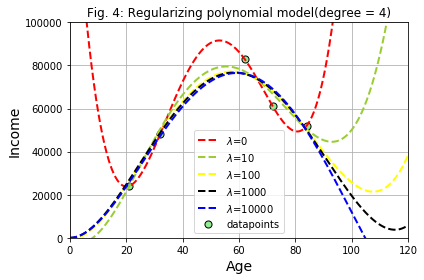

In [10]:
degree = 4 # The polynomial degree to be regularized
plt.figure(4)
plt.title("Fig. 4: Regularizing polynomial model(degree = %d)" % (degree))
plot_dataset(X,y)
colors = ['red', 'yellowgreen','yellow','black','blue']
for count, Lambda in enumerate([0,10,100,1000,10000]):
    Xvals, theta_ridge = polynomial_ridge_regression(X,y,degree,Lambda)
    plt.plot(Xvals[:,1],np.dot(Xvals, theta_ridge),"--", color=colors[count], 
             linewidth=2, label="%s=%d" % (r'$\lambda$',Lambda))
plt.axis([0.0,120.0,0.0,100000])
plt.legend()
save_fig("ridge_regression")
plt.show()